In [25]:
import matplotlib.pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean

myseed = 7
random.seed(myseed)
np.random.seed(myseed)

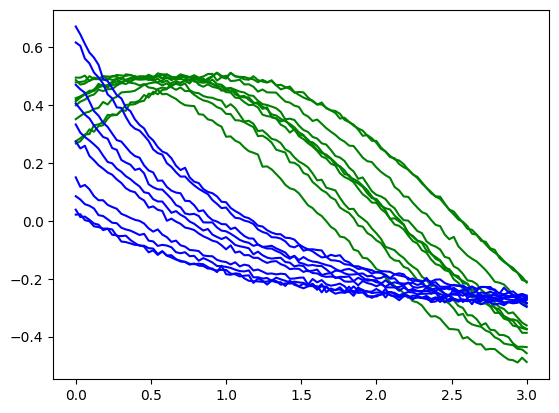

In [26]:
time = np.linspace(0, 3, num=100)
N = 10
timeseries = []
rand = np.random.random(size=20)

for i in range(10):
    timeseries.append(0.5 * np.sin(time +  rand[i] + 0.5))
    noise1 = np.random.normal(0, 0.006, len(timeseries[i]))
    timeseries[i] = timeseries[i] + noise1
for i in range(10, 20):
    timeseries.append(np.exp(-(time + rand[i] * 1.2)) - 0.3)
    noise2 = np.random.normal(0, 0.006, len(timeseries[i]))
    timeseries[i] = timeseries[i] + noise2

for i in range(10):
    plt.plot(time, timeseries[i], '-g')

for i in range(10,20):
    plt.plot(time, timeseries[i], '-b')

In [27]:
def class_labels(T):
    class_labels = []
    for i in range(len(T)):
        if i < 10:
            class_labels.append(1)  
        else:
            class_labels.append(2) 
    return class_labels

In [28]:
def generate_candidates(Ti, min_len = 3, max_len = 100):
    candidates = []
    for l in range(min_len, max_len + 1):
        for i in range(len(Ti) - l + 1):
            subsequence = Ti[i:i + l]
            candidates.append(subsequence)
    return candidates

In [29]:
def find_distances(S, Wi_l):
    distances = [euclidean(S, candidate) for candidate in Wi_l]
    return distances

In [30]:
def assess_candidate(S, DS):
    quality = np.mean(np.sqrt(DS))
    return quality

In [31]:
def insert_shapelet(rShapelets, shapelet):
    result = []
    i = 0
    for i in range(len(rShapelets)):
        if rShapelets[i][1] <= shapelet[1]:
            result += [rShapelets[i]]
        if rShapelets[i][1] > shapelet[1]:
            if i == 0 or rShapelets[i - 1][1] < shapelet[1]:
                result += [shapelet]
            else:
                result += [rShapelets[i - 1]]
    return result

In [32]:
def merge(k, kShapelets, shapelets):
    if len(kShapelets) == 0:
        return shapelets[0:k]
    result = kShapelets
    for shapelet in shapelets:
        if shapelet[1] < kShapelets[len(kShapelets) - 1][1]:
            kShapelets = insert_shapelet(result, shapelet)
    return result

In [33]:
def filter_shapelets(x, min = 0.05):
    result = []
    for xi in x:
        if xi[1] <= min:
            result += [xi]
    return result

In [34]:
def shapelet_selection(tseries_list, k = 50, min_len = 3, max_len = 100):
    kShapelets = []
    class_labels_ = class_labels(tseries_list)
    for tseries in tseries_list:
        shapelets = []
        for l in range(min_len, max_len + 1):
            candidates = generate_candidates(tseries, min_len, max_len)
            for candidate in candidates:
                distances = find_distances(candidate, candidates)
                quality = assess_candidate(candidate, distances)
                shapelets.append((candidate, quality))
        shapelets = filter_shapelets(shapelets, quality)
        shapelets.sort(key=lambda x: x[1], reverse=True)
        kShapelets = merge(k, kShapelets, shapelets)
    return kShapelets

In [35]:
K_shapletes_exp = shapelet_selection(timeseries[0:10], k = 20, min_len= 4 , max_len= 4)
K_shapletes_sin = shapelet_selection(timeseries[11:20], k = 20, min_len= 4 , max_len= 4)
print(K_shapletes_exp)
print(K_shapletes_sin)

[(array([-0.16220096, -0.17932662, -0.20414055, -0.20947885]), 0.9484859660455223), (array([-0.15239779, -0.16220096, -0.17932662, -0.20414055]), 0.9320127189664195), (array([-0.14144294, -0.15239779, -0.16220096, -0.17932662]), 0.914447317350802), (array([-0.12785391, -0.14144294, -0.15239779, -0.16220096]), 0.9007738834692777), (array([-0.10007401, -0.12785391, -0.14144294, -0.15239779]), 0.8850989069324384), (array([-0.09461321, -0.10007401, -0.12785391, -0.14144294]), 0.8707213546766276), (array([-0.0720801 , -0.09461321, -0.10007401, -0.12785391]), 0.8538886236804303), (array([-0.06906937, -0.0720801 , -0.09461321, -0.10007401]), 0.8396775065418262), (array([-0.04768635, -0.06906937, -0.0720801 , -0.09461321]), 0.8274805249136048), (array([-0.04416845, -0.04768635, -0.06906937, -0.0720801 ]), 0.8162445245496288), (array([-0.0180332 , -0.04416845, -0.04768635, -0.06906937]), 0.8045889510031219), (array([-0.00299029, -0.0180332 , -0.04416845, -0.04768635]), 0.7905873252554078), (arr

In [36]:
import random

x = []
Y = []
shpletes_qual = K_shapletes_exp + K_shapletes_sin

for i in range(len(shpletes_qual)):
    res = list(shpletes_qual[i][0]) + [shpletes_qual[i][1]]  
    x.append(res)
    
    if i < len(K_shapletes_exp):
        Y.append(1)
    else:
        Y.append(2)

X_train = []
X_test = []
Y_train = []
Y_test = []
print(shpletes_qual)

indexes = np.arange(len(Y))
random.shuffle(indexes)
for i in range(int(len(Y) * 0.7)):
    X_train.append(x[indexes[i] - 1])
    Y_train.append(Y[indexes[i] - 1])

for i in range(int(len(Y) * 0.7), len(Y)):
    X_test.append(x[indexes[i] - 1])
    Y_test.append(Y[indexes[i] - 1])

Y_train, Y_test

[(array([-0.16220096, -0.17932662, -0.20414055, -0.20947885]), 0.9484859660455223), (array([-0.15239779, -0.16220096, -0.17932662, -0.20414055]), 0.9320127189664195), (array([-0.14144294, -0.15239779, -0.16220096, -0.17932662]), 0.914447317350802), (array([-0.12785391, -0.14144294, -0.15239779, -0.16220096]), 0.9007738834692777), (array([-0.10007401, -0.12785391, -0.14144294, -0.15239779]), 0.8850989069324384), (array([-0.09461321, -0.10007401, -0.12785391, -0.14144294]), 0.8707213546766276), (array([-0.0720801 , -0.09461321, -0.10007401, -0.12785391]), 0.8538886236804303), (array([-0.06906937, -0.0720801 , -0.09461321, -0.10007401]), 0.8396775065418262), (array([-0.04768635, -0.06906937, -0.0720801 , -0.09461321]), 0.8274805249136048), (array([-0.04416845, -0.04768635, -0.06906937, -0.0720801 ]), 0.8162445245496288), (array([-0.0180332 , -0.04416845, -0.04768635, -0.06906937]), 0.8045889510031219), (array([-0.00299029, -0.0180332 , -0.04416845, -0.04768635]), 0.7905873252554078), (arr

([1,
  2,
  1,
  1,
  1,
  1,
  2,
  2,
  1,
  1,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  2,
  2,
  1,
  2,
  1,
  2,
  2,
  1,
  1,
  1],
 [2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1])

In [37]:
from pyts.classification import TimeSeriesForest
 
clf = TimeSeriesForest(random_state=42)
clf.fit(X_train, Y_train)

print(f"Accuracy {clf.score(X_test, Y_test)}")
for i in range(len(Y_test)):
    print(f"{i + 1} объект:")
    print(f"Вектор вероятности принадлежности к классам {clf.predict_proba(X_test[i].reshape(1, -1))}")
    print(f"Истинный класс для предсказаний {Y_test[i]}")

Accuracy 1.0
1 объект:


AttributeError: 'list' object has no attribute 'reshape'